In [22]:
import pandas as pd
import os

In [23]:
os.getcwd()

'd:\\Code\\PythonAZ'

In [24]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [25]:
movies.shape

(559, 6)

In [26]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [27]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [28]:
movies.columns=['Film','Genre','CriticsRating','AudienceRating','BudgetMillions','Year']

In [29]:
movies.head()

,Film,Genre,CriticsRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticsRating   559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 21.9+ KB


In [31]:
movies.describe()

,CriticsRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [32]:
# Film is treated as a object but it should be a category.
movies.Film = movies.Film.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticsRating   559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 35.0+ KB


In [33]:
# Same with genre and year
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticsRating   559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 29.9 KB


In [34]:
# To find out what unique catories exist
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [37]:
# .describe() now does not show the categories bc it does not make sense
movies.describe()

,CriticsRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

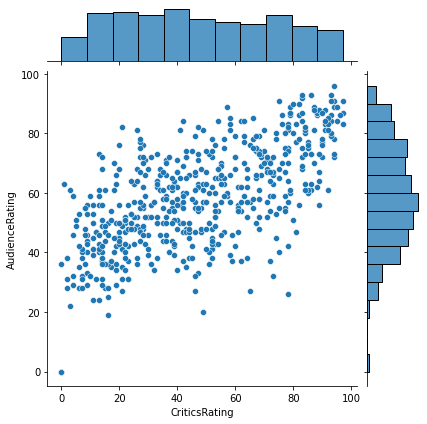

In [41]:
# Jointplot
j = sns.jointplot(data=movies, x='CriticsRating', y='AudienceRating')

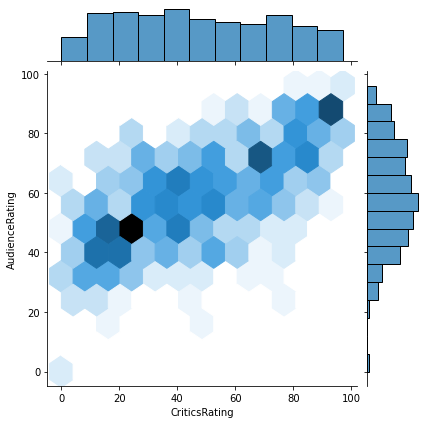

In [42]:
# Using kind='hex' to identify clusters
j = sns.jointplot(data=movies, x='CriticsRating', y='AudienceRating', kind='hex')

In [ ]:
# Histograms

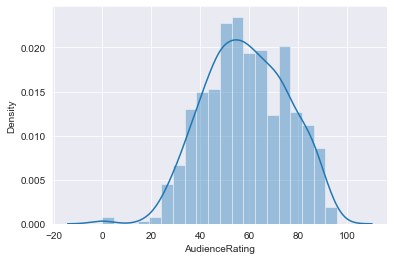

In [51]:
sns.set_style('darkgrid')
m1 = sns.distplot(movies.AudienceRating, bins=20)

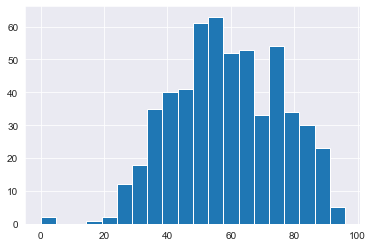

In [52]:
n1 = plt.hist(movies.AudienceRating, bins=20)

In [ ]:
# Grid styling
sns.set_style('darkgrid')
sns.set_style('white')

In [ ]:
# Stacked histograms

<function matplotlib.pyplot.show(*args, **kw)>

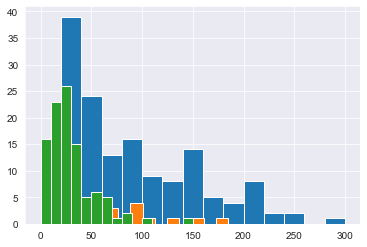

In [65]:
# By specifying each data column separately we get overlaid columns
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.show

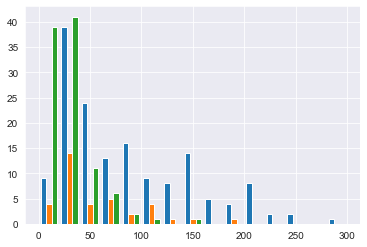

In [72]:
# To get columns next to each other, we need to send data in as a list
plt.hist(\
[movies[movies.Genre == 'Action'].BudgetMillions, \
movies[movies.Genre == 'Thriller'].BudgetMillions, \
movies[movies.Genre == 'Drama'].BudgetMillions], \
bins=15)
plt.show()



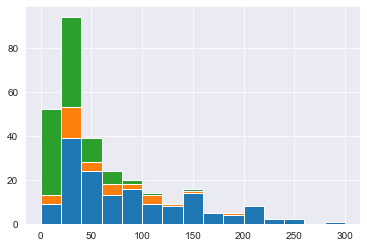

In [73]:
# To get columns stacked, we need to add "stacked=True"
plt.hist(\
[movies[movies.Genre == 'Action'].BudgetMillions, \
movies[movies.Genre == 'Thriller'].BudgetMillions, \
movies[movies.Genre == 'Drama'].BudgetMillions], \
bins=15, stacked=True)
plt.show()

In [74]:
# Let's automate this plot over all the genres
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


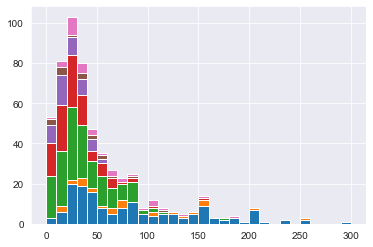

In [77]:
# create an empty list and then populate it with series of budgets per genre
# append changes the underlying object
# plot the list
# stacked
# rwidth=1 -> no gaps
list1 = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1)

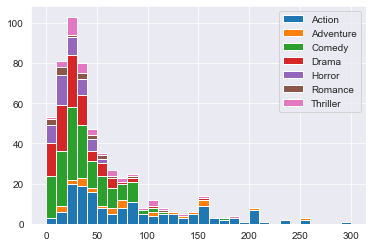

In [80]:
# add a legend
# we need a list of labels to pass to 'label'
# plt.legend() to display the legend
list1 = []
mylabels=[]
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()